In [102]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [ ]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'd6812597e5864c9eae613623d8133018' }).json()
        return json[result_key]
    except:
        print(json)
        return None
        
teams = call_api('http://api.football-data.org/v1/soccerseasons/405/teams', 'teams')

for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    wins = 0
    defeats = 0
    draws = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            try:
                if int(f['result']['goalsHomeTeam']) > int(f['result']['goalsAwayTeam']):
                    wins += 1
                elif int(f['result']['goalsHomeTeam']) < int(f['result']['goalsAwayTeam']):
                    defeats += 1
                else:
                    draws += 1
            except TypeError:
                pass
        else:
            try:
                if int(f['result']['goalsAwayTeam']) > int(f['result']['goalsHomeTeam']):
                    wins += 1
                elif int(f['result']['goalsAwayTeam']) < int(f['result']['goalsHomeTeam']):
                    defeats += 1
                else:
                    draws += 1
            except TypeError:
                pass
    team['wins'] = wins
    team['defeats'] = defeats
    team['draws'] = draws
    team['squadMarketValue'] = float(team['squadMarketValue'][:-2].replace(',', ''))

Готовим данные для трансформации в Pandas

In [106]:
#Готовим данные для трансформации в Pandas
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'squadMarketValue': team['squadMarketValue'], 'wins': team['wins'], 'draws': team['draws'], 'defeats': team['defeats']})


team_for_pd = [{'defeats': 5, 'name': 'Paris Saint-Germain', 'draws': 8, 'squadMarketValue': 465400000.0, 'wins': 29}, {'defeats': 6, 'name': 'Malmö FF', 'draws': 0, 'squadMarketValue': 13500000.0, 'wins': 2}, {'defeats': 5, 'name': 'SL Benfica', 'draws': 8, 'squadMarketValue': 202850000.0, 'wins': 25}, {'defeats': 1, 'name': 'FC Astana', 'draws': 1, 'squadMarketValue': 14500000.0, 'wins': 0}, {'defeats': 8, 'name': 'Sevilla FC', 'draws': 10, 'squadMarketValue': 236000000.0, 'wins': 23}, {'defeats': 16, 'name': 'Bor. Mönchengladbach', 'draws': 9, 'squadMarketValue': 163550000.0, 'wins': 16}, {'defeats': 8, 'name': 'Manchester City FC', 'draws': 12, 'squadMarketValue': 525250000.0, 'wins': 28}, {'defeats': 4, 'name': 'Juventus Turin', 'draws': 5, 'squadMarketValue': 450800000.0, 'wins': 34}, {'defeats': 3, 'name': 'Galatasaray SK', 'draws': 2, 'squadMarketValue': 123250000.0, 'wins': 1}, {'defeats': 7, 'name': 'Club Atlético de Madrid', 'draws': 10, 'squadMarketValue': 501500000.0, 'wins': 27}, {'defeats': 16, 'name': 'VfL Wolfsburg', 'draws': 6, 'squadMarketValue': 154000000.0, 'wins': 11}, {'defeats': 3, 'name': 'CSKA Moscow', 'draws': 3, 'squadMarketValue': 152650000.0, 'wins': 0}, {'defeats': 6, 'name': 'PSV Eindhoven', 'draws': 11, 'squadMarketValue': 113200000.0, 'wins': 21}, {'defeats': 4, 'name': 'Manchester United FC', 'draws': 12, 'squadMarketValue': 466000000.0, 'wins': 20}, {'defeats': 3, 'name': 'Real Madrid CF', 'draws': 9, 'squadMarketValue': 764800000.0, 'wins': 31}, {'defeats': 5, 'name': 'Shakhtar Donetsk', 'draws': 1, 'squadMarketValue': 140100000.0, 'wins': 2}, {'defeats': 16, 'name': 'Valencia CF', 'draws': 7, 'squadMarketValue': 184700000.0, 'wins': 11}, {'defeats': 3, 'name': 'FC Zenit St. Petersburg', 'draws': 0, 'squadMarketValue': 190400000.0, 'wins': 5}, {'defeats': 3, 'name': 'Dynamo Kyiv', 'draws': 2, 'squadMarketValue': 123250000.0, 'wins': 1}, {'defeats': 4, 'name': 'FC Porto', 'draws': 12, 'squadMarketValue': 179750000.0, 'wins': 24}, {'defeats': 5, 'name': 'Chelsea FC', 'draws': 3, 'squadMarketValue': 515000000.0, 'wins': 30}, {'defeats': 6, 'name': 'Maccabi Tel Aviv', 'draws': 2, 'squadMarketValue': 21550000.0, 'wins': 0}, {'defeats': 3, 'name': 'Olympiacos F.C.', 'draws': 0, 'squadMarketValue': 3630000.0, 'wins': 3}, {'defeats': 7, 'name': 'FC Bayern München', 'draws': 7, 'squadMarketValue': 566150000.0, 'wins': 31}, {'defeats': 6, 'name': 'GNK Dinamo Zagreb', 'draws': 0, 'squadMarketValue': 48250000.0, 'wins': 0}, {'defeats': 10, 'name': 'Arsenal FC', 'draws': 9, 'squadMarketValue': 492500000.0, 'wins': 26}, {'defeats': 7, 'name': 'AS Roma', 'draws': 4, 'squadMarketValue': 306000000.0, 'wins': 24}, {'defeats': 7, 'name': 'FC Barcelona', 'draws': 7, 'squadMarketValue': 756500000.0, 'wins': 30}, {'defeats': 15, 'name': 'Bayer Leverkusen', 'draws': 12, 'squadMarketValue': 273950000.0, 'wins': 13}, {'defeats': 4, 'name': 'FK BATE Baryssau', 'draws': 2, 'squadMarketValue': 18200000.0, 'wins': 2}, {'defeats': 4, 'name': 'KAA Gent', 'draws': 1, 'squadMarketValue': 48100000.0, 'wins': 3}, {'defeats': 15, 'name': 'Olympique Lyonnais', 'draws': 5, 'squadMarketValue': 200800000.0, 'wins': 19}]

In [ ]:
team_for_pd

Трансформируем

In [107]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd = teams_pd[['name', 'squadMarketValue', 'wins', 'draws', 'defeats']]
teams_pd

,name,squadMarketValue,wins,draws,defeats
0,Paris Saint-Germain,465400000.0,29,8,5
1,Malmö FF,13500000.0,2,0,6
2,SL Benfica,202850000.0,25,8,5
3,FC Astana,14500000.0,0,1,1
4,Sevilla FC,236000000.0,23,10,8
5,Bor. Mönchengladbach,163550000.0,16,9,16
6,Manchester City FC,525250000.0,28,12,8
7,Juventus Turin,450800000.0,34,5,4
8,Galatasaray SK,123250000.0,1,2,3
9,Club Atlético de Madrid,501500000.0,27,10,7


### Кластеризация по стоимости и количеству проигрышей

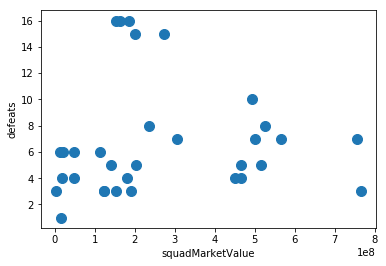

In [108]:
a = teams_pd.plot.scatter(x='squadMarketValue', y='defeats', s=100)

Нормализация данных

In [109]:
teams_pd_2 = pd.DataFrame(team_for_pd)
del teams_pd_2['name']
del teams_pd_2['draws']
del teams_pd_2['wins']

teams_pd_2

,defeats,squadMarketValue
0,5,465400000.0
1,6,13500000.0
2,5,202850000.0
3,1,14500000.0
4,8,236000000.0
5,16,163550000.0
6,8,525250000.0
7,4,450800000.0
8,3,123250000.0
9,7,501500000.0


In [110]:
whitened = whiten(teams_pd_2.as_matrix())
whitened

array([[ 1.17803206,  2.15868293],
       [ 1.41363847,  0.06261758],
       [ 1.17803206,  0.94088705],
       [ 0.23560641,  0.06725591],
       [ 1.88485129,  1.09464798],
       [ 3.76970258,  0.75860033],
       [ 1.88485129,  2.43628751],
       [ 0.94242565,  2.09096318],
       [ 0.70681923,  0.57167527],
       [ 1.64924488,  2.32612696],
       [ 3.76970258,  0.71430419],
       [ 0.70681923,  0.70804243],
       [ 1.41363847,  0.52505996],
       [ 0.94242565,  2.16146593],
       [ 0.70681923,  3.5474016 ],
       [ 1.17803206,  0.64983128],
       [ 3.76970258,  0.8567012 ],
       [ 0.70681923,  0.88313973],
       [ 0.70681923,  0.57167527],
       [ 0.94242565,  0.83374142],
       [ 1.17803206,  2.38874454],
       [ 1.41363847,  0.0999562 ],
       [ 0.70681923,  0.01683717],
       [ 1.64924488,  2.62599557],
       [ 1.41363847,  0.22379985],
       [ 2.35606411,  2.28438191],
       [ 1.64924488,  1.41933171],
       [ 1.64924488,  3.50890339],
       [ 3.53409617,

Сделаем 3 кластера и зададим цвета

In [111]:
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'b',
 'b',
 'b',
 'b',
 'g',
 'r',
 'r',
 'b',
 'r',
 'g',
 'b',
 'b',
 'r',
 'r',
 'b',
 'g',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'g',
 'b',
 'b',
 'g']

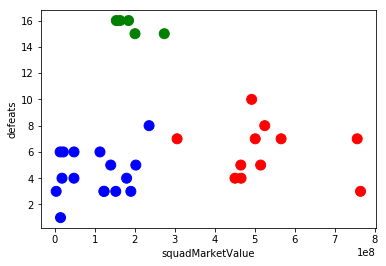

In [112]:
teams_pd_2.plot.scatter(x='squadMarketValue', y='defeats', c=colors, s=100)

Вариант с 5 кластерами

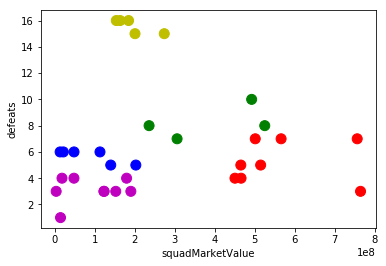

In [114]:
centroids, cluster_map = kmeans2(whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd_2.plot.scatter(x='squadMarketValue', y='defeats', c=colors, s=100)

### Кластеризация по стоимости и соотношению побед/проигрышей

In [115]:
teams_pd['winsPercent'] = teams_pd['wins'] / (teams_pd['wins'] + teams_pd['defeats'])

In [116]:
teams_pd

,name,squadMarketValue,wins,draws,defeats,winsPercent
0,Paris Saint-Germain,465400000.0,29,8,5,0.852941
1,Malmö FF,13500000.0,2,0,6,0.250000
2,SL Benfica,202850000.0,25,8,5,0.833333
3,FC Astana,14500000.0,0,1,1,0.000000
4,Sevilla FC,236000000.0,23,10,8,0.741935
5,Bor. Mönchengladbach,163550000.0,16,9,16,0.500000
6,Manchester City FC,525250000.0,28,12,8,0.777778
7,Juventus Turin,450800000.0,34,5,4,0.894737
8,Galatasaray SK,123250000.0,1,2,3,0.250000
9,Club Atlético de Madrid,501500000.0,27,10,7,0.794118


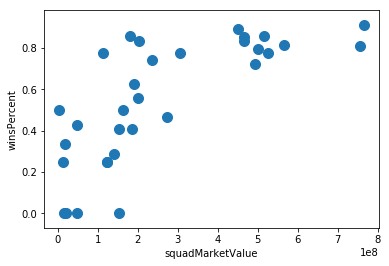

In [117]:
teams_pd.plot.scatter(x='squadMarketValue', y='winsPercent', s=100)

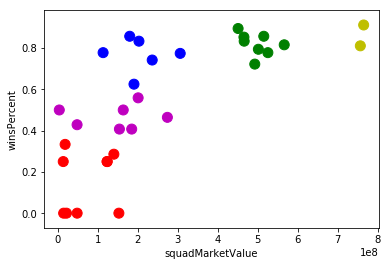

In [119]:
del teams_pd['name']
del teams_pd['draws']
del teams_pd['wins']
del teams_pd['defeats']

whitened_2 = whiten(teams_pd.as_matrix())

centroids, cluster_map = kmeans2(whitened_2, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

teams_pd.plot.scatter(x='squadMarketValue', y='winsPercent', c=colors, s=100)